In [1]:
# 加载数据集
from keras.datasets import reuters

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 9s 4us/step


In [4]:
# 索引解码为新闻文本
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 6s 10us/step


In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [6]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
# 编码数据
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [9]:
# 使用keras内置的方法实现上个cell中的代码
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [10]:
# 定义模型
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [11]:
# 编译模型
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# 验证集
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [13]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 212us/step - loss: 2.5241 - acc: 0.4977 - val_loss: 1.7183 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 120us/step - loss: 1.4443 - acc: 0.6889 - val_loss: 1.3496 - val_acc: 0.7090
Epoch 3/20
7982/7982 [==============================] - 1s 122us/step - loss: 1.0993 - acc: 0.7641 - val_loss: 1.1745 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 121us/step - loss: 0.8729 - acc: 0.8157 - val_loss: 1.0842 - val_acc: 0.7580
Epoch 5/20
7982/7982 [==============================] - 1s 123us/step - loss: 0.7061 - acc: 0.8492 - val_loss: 0.9867 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 1s 126us/step - loss: 0.5696 - acc: 0.8792 - val_loss: 0.9415 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 122us/step - loss: 0.4625 - acc: 0.9033 - val_loss: 0.9100 - val_acc: 0.8010


In [14]:
import os

path = os.path.join(os.getcwd(), 'models')
name = os.path.join(path, 'model-reuters.h5')
model.save(name)

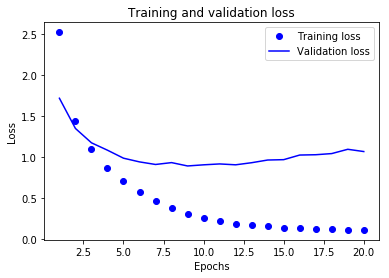

In [16]:
# 绘制训练损失和验证损失
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

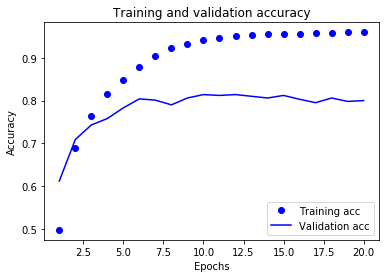

In [17]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [18]:
# 重新训练一个模型
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 148us/step - loss: 2.5397 - acc: 0.5224 - val_loss: 1.6735 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 123us/step - loss: 1.3713 - acc: 0.7120 - val_loss: 1.2761 - val_acc: 0.7200
Epoch 3/9
7982/7982 [==============================] - 1s 124us/step - loss: 1.0143 - acc: 0.7781 - val_loss: 1.1305 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 122us/step - loss: 0.7979 - acc: 0.8246 - val_loss: 1.0542 - val_acc: 0.7600
Epoch 5/9
7982/7982 [==============================] - 1s 123us/step - loss: 0.6395 - acc: 0.8628 - val_loss: 0.9766 - val_acc: 0.7940
Epoch 6/9
7982/7982 [==============================] - 1s 124us/step - loss: 0.5123 - acc: 0.8920 - val_loss: 0.9110 - val_acc: 0.8130
Epoch 7/9
7982/7982 [==============================] - 1s 124us/step - loss: 0.4123 - acc: 0.9149 - val_loss: 0.8918 - val_acc: 0.8200
Epoch 8

In [21]:
import os

path = os.path.join(os.getcwd(), 'models')
name = os.path.join(path, 'model-reuters-2.h5')

model.save(name)

In [22]:
results = model.evaluate(x_test, one_hot_test_labels)

results

2246/2246 [==============================] - 0s 145us/step


[1.0227376359547236, 0.7764915405695499]

In [23]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.182546749777382

In [24]:
# 使用模型预测
predictions = model.predict(x_test)
print(predictions[0].shape)
print(np.sum(predictions[0]))
print(np.argmax(predictions[0]))

(46,)
0.9999998
3


In [ ]:
# 另一种编码标签的方法
y_train = np.array(train_labels)
y_test = np.array(test_labels)

# 编译时需要选择对应的损失函数，该损失函数与前面的在数学上完全相同，只是接口不同
model.compile(optimizer='rmsprop', loss='soarse_categorical_crossentropy', metrics=['acc'])

In [25]:
# 当中间层维度不够时，会生成具有信息瓶颈的模型
mdoel = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

mdoel.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 203us/step - loss: 3.5054 - acc: 0.3493 - val_loss: 3.1633 - val_acc: 0.3890
Epoch 2/20
7982/7982 [==============================] - 1s 167us/step - loss: 2.7038 - acc: 0.4709 - val_loss: 2.3002 - val_acc: 0.5710
Epoch 3/20
7982/7982 [==============================] - 1s 174us/step - loss: 1.8785 - acc: 0.6120 - val_loss: 1.7616 - val_acc: 0.5730
Epoch 4/20
7982/7982 [==============================] - 1s 174us/step - loss: 1.4783 - acc: 0.6118 - val_loss: 1.5794 - val_acc: 0.5770
Epoch 5/20
7982/7982 [==============================] - 1s 169us/step - loss: 1.2744 - acc: 0.6125 - val_loss: 1.4864 - val_acc: 0.5820
Epoch 6/20
7982/7982 [==============================] - 1s 169us/step - loss: 1.1409 - acc: 0.6248 - val_loss: 1.4806 - val_acc: 0.6100
Epoch 7/20
7982/7982 [==============================] - 1s 177us/step - loss: 1.0372 - acc: 0.7122 - val_loss: 1.4568 - val_acc: 0.6590


In [26]:
results = model.evaluate(x_test, one_hot_test_labels)
results

2246/2246 [==============================] - 0s 138us/step


[1.8061607737469014, 0.7083704363843318]